<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%204/compas-scores-two-years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)
from google.colab import files


In [2]:
# Upload File CSV
uploaded = files.upload()

# Load Dataset
df = pd.read_csv(next(iter(uploaded)))

# Target
target = 'two_year_recid'

# Drop kolom identitas dan yang tidak berguna
drop_cols = [
    'id', 'name', 'first', 'last', 'dob', 'compas_screening_date',
    'v_screening_date', 'in_custody', 'out_custody', 'start', 'end',
    'event', 'decile_score', 'score_text', 'v_decile_score', 'v_score_text'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Drop data NaN penting
df = df.dropna(subset=[target, 'age', 'sex', 'race', 'priors_count'])

# Encode kolom kategorikal
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Pastikan target dalam bentuk integer
df[target] = df[target].astype(int)


Saving compas-scores-two-years.csv to compas-scores-two-years.csv


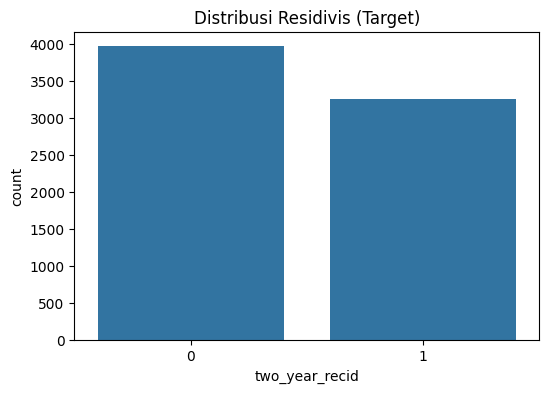

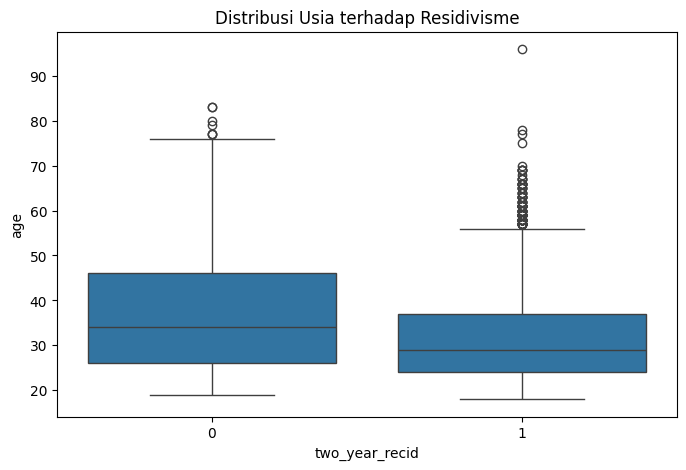

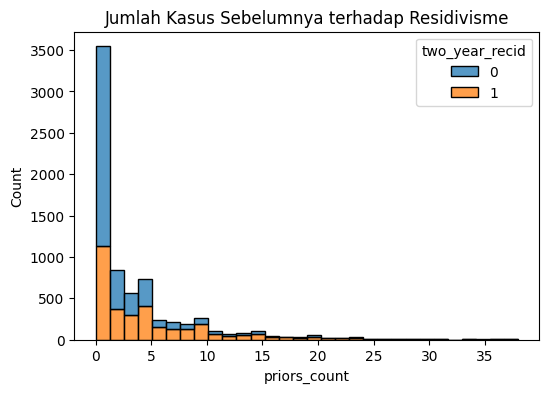

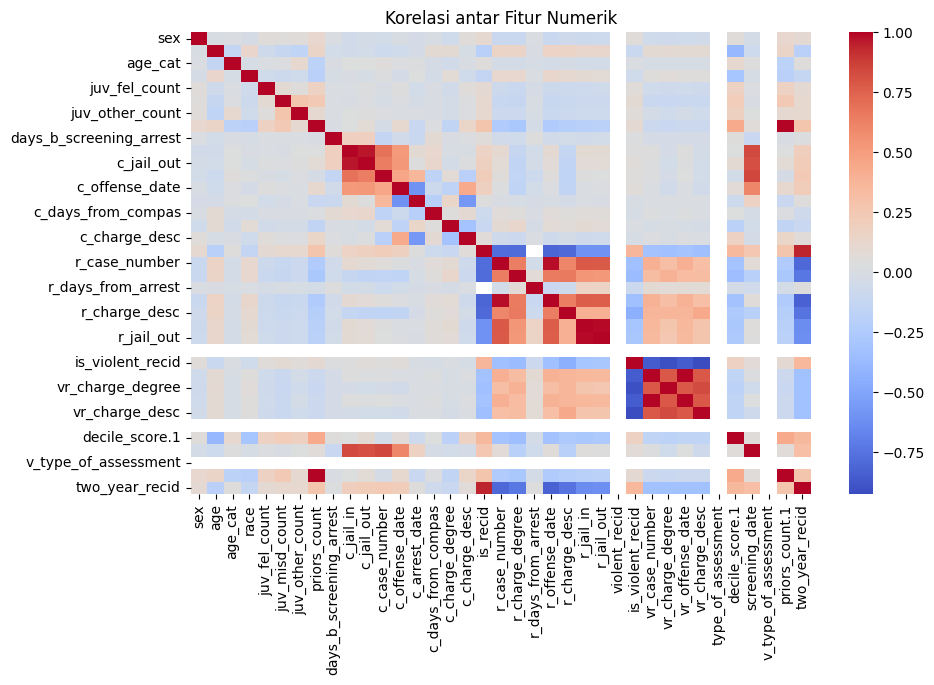

In [3]:
# EDA & Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target)
plt.title("Distribusi Residivis (Target)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=target, y='age')
plt.title("Distribusi Usia terhadap Residivisme")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='priors_count', hue=target, multiple="stack", bins=30)
plt.title("Jumlah Kasus Sebelumnya terhadap Residivisme")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Korelasi antar Fitur Numerik")
plt.show()

In [4]:
# Training Model
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [5]:
# Evaluasi Model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("🔎 Classification Report:\n")
print(classification_report(y_test, y_pred))
print(f"Akurasi     : {acc:.2f}")
print(f"Presisi     : {prec:.2f}")
print(f"Recall      : {rec:.2f}")
print(f"F1 Score    : {f1:.2f}")
print(f"ROC AUC     : {roc_auc:.2f}")

🔎 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       823
           1       0.99      0.99      0.99       620

    accuracy                           0.99      1443
   macro avg       0.99      0.99      0.99      1443
weighted avg       0.99      0.99      0.99      1443

Akurasi     : 0.99
Presisi     : 0.99
Recall      : 0.99
F1 Score    : 0.99
ROC AUC     : 1.00


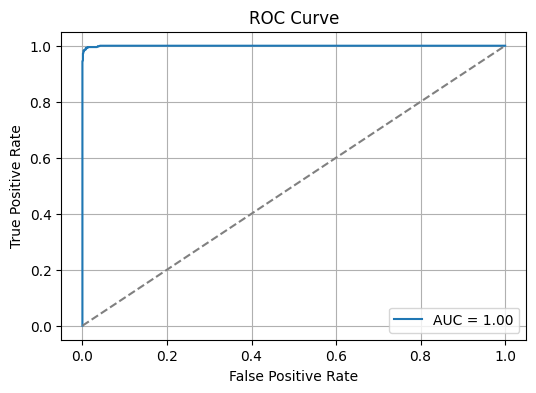

In [6]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

1. Akurasi

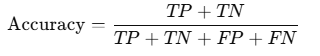

Penjelasan:

Mengukur seberapa banyak prediksi yang benar dibandingkan total seluruh data.

Cocok digunakan jika data seimbang (jumlah label positif dan negatif seimbang).

TP = True Positives: kasus positif yang diprediksi benar

TN = True Negatives: kasus negatif yang diprediksi benar

FP = False Positives: kasus negatif yang diprediksi sebagai positif

FN = False Negatives: kasus positif yang diprediksi sebagai negatif

2. Presisi

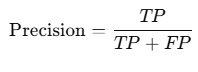

Penjelasan:

Mengukur seberapa banyak prediksi positif yang benar-benar positif.

Berguna ketika biaya salah prediksi positif tinggi (misalnya diagnosa penyakit serius).

Mencegah terlalu banyak False Positives.

3. Recall

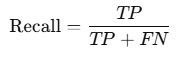

Penjelasan:

Mengukur seberapa banyak kasus positif yang berhasil ditemukan oleh model.

Penting jika menghindari kesalahan deteksi negatif (False Negatives).

Biasanya digunakan dalam aplikasi kesehatan, keamanan, dan forensik.